# Sonification: Convert data to MIDI
### https://hub-binder.mybinder.ovh/user/systemsounds-so-ation-tutorials-z29azx89/doc/tree/data2midi-part1.ipynb
#### https://www.youtube.com/watch?v=DUdLRy8i9qI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Load data (.csv file)

In [2]:
filename = 'lunarCraterAges'

df = pd.read_csv('./data/'+filename + '.csv')

df = df.sort_values(by = 'age', ascending = False)
# by = 'age' 열의 기준에 따라 False 내림차순, True 오름차순 
n_impact = len(df) #num of row

print(n_impact)
df.head()

111


,names,longitude,latitude,diameter,age
60,Mosting A,354.80469,-3.22070,12.7,1324
50,NaN,262.67029,43.65850,13.6,1026
45,NaN,79.73330,22.83180,14.3,993
2,King,120.49220,4.93750,76.2,992
41,Hume Z,90.41211,-3.62497,15.0,981


In [3]:
# idx값을 통해 행의 값을 가져오기
test0_0 = df.loc[2] # 정보를 행에 대한 열의 정보로 가져옴
test0_1 = df.loc[[2]] # 정보를 행의 값 그 자체로 가져옴

# row값을 통해 행의 정보를 가져오기
test1_0 = df.iloc[2] # 정보를 행에 대한 열의 정보로 가져옴
test1_1 = df.iloc[[2]] # 정보를 행의 값 그 자체로 가져옴



## 2. Plot data

In [4]:
# 나이에 대한 정보와 지름에 대한 정보만을 바탕으로 그래프를 그릴거임

ages = df['age'].values # 열값을 받아오는 
diameters = df['diameter'].values # 열값을 받아오는 

#### plot = 그래프형태 , scatter = 산포도형태 - 차이 구분

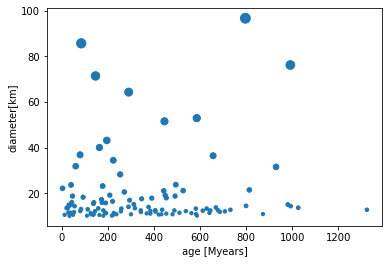

In [5]:
plt.scatter(ages, diameters, s = diameters) 
plt.ylabel('diameter[km]')
plt.xlabel('age [Myears]')
plt.show()
# s = size diameter의 크기에 따라 다르게 크기가 적용됨
# c = clor 

#### 만약 뒤집고 싶다면 x값을 반대로 두면 된다.

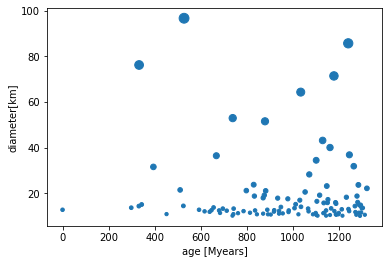

In [6]:
time_Myears = max(ages) - ages # 가장 오래된 친구들 먼저 측정
#List의 특징을이용해서 이렇게 제거를 한 것
plt.scatter(time_Myears, diameters, s = diameters) 
plt.ylabel('diameter[km]')
plt.xlabel('age [Myears]')
plt.show()

## 3. Write general mapping function

#### Maping 하는 함수

In [1]:
def map_value(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''
    
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

map_value(8,10,20,100,200)

80.0

### 3.1 Compress Time

#### option 1 - max t_data = duration

In [8]:
Myears_per_beat = 25
t_data1 = time_Myears/Myears_per_beat

t_data1 # MIDI FIle에는 beat로 이야기하지 sec로 이야기하지않음 참고 
duration_beats_1 = max(t_data1)
print('Duration : {} beats'.format(duration_beats_1))
print(t_data1)

Duration : 52.8 beats
[ 0.   11.92 13.24 13.28 13.72 15.76 18.04 20.4  20.96 21.08 23.68 24.64
 25.52 25.84 26.2  26.68 27.16 27.32 27.8  28.48 29.48 29.52 29.64 29.68
 30.44 31.4  31.88 32.52 33.16 33.28 33.4  33.72 34.8  34.8  35.   35.12
 35.24 35.52 35.64 36.12 36.68 36.72 37.32 37.56 37.56 37.88 38.2  39.08
 39.2  39.24 40.24 40.44 40.92 41.16 41.32 41.36 42.08 42.6  42.68 42.8
 43.44 43.92 44.   44.04 44.12 44.24 44.6  45.12 45.24 45.32 45.4  45.72
 45.72 45.84 45.96 46.04 46.4  46.4  46.6  47.08 47.16 47.36 47.4  47.44
 47.48 47.84 47.92 48.44 48.56 49.24 49.56 49.6  49.72 49.76 50.52 50.72
 50.8  50.96 51.08 51.2  51.32 51.36 51.4  51.6  51.64 51.72 51.8  51.92
 52.08 52.44 52.8 ]


#### option2 - fix duration

In [9]:
duration_beats_2 = 60


t_data2 = map_value(time_Myears, 0, max(time_Myears), 0, duration_beats_2)
print('Duration : {} beats'.format(duration_beats_2))
print(t_data2)

Duration : 60 beats
[ 0.         13.54545455 15.04545455 15.09090909 15.59090909 17.90909091
 20.5        23.18181818 23.81818182 23.95454545 26.90909091 28.
 29.         29.36363636 29.77272727 30.31818182 30.86363636 31.04545455
 31.59090909 32.36363636 33.5        33.54545455 33.68181818 33.72727273
 34.59090909 35.68181818 36.22727273 36.95454545 37.68181818 37.81818182
 37.95454545 38.31818182 39.54545455 39.54545455 39.77272727 39.90909091
 40.04545455 40.36363636 40.5        41.04545455 41.68181818 41.72727273
 42.40909091 42.68181818 42.68181818 43.04545455 43.40909091 44.40909091
 44.54545455 44.59090909 45.72727273 45.95454545 46.5        46.77272727
 46.95454545 47.         47.81818182 48.40909091 48.5        48.63636364
 49.36363636 49.90909091 50.         50.04545455 50.13636364 50.27272727
 50.68181818 51.27272727 51.40909091 51.5        51.59090909 51.95454545
 51.95454545 52.09090909 52.22727273 52.31818182 52.72727273 52.72727273
 52.95454545 53.5        53.59090909 53

### 3.2 Make Beat

In [10]:
bpm = 60 # if bpm = 60, 1beat = 1sec
duration_sec1 = duration_beats_1 * 60/bpm
duration_sec2 = duration_beats_2 * 60/bpm

##### Data를 Beat로 변환한 후 scatter로 표현

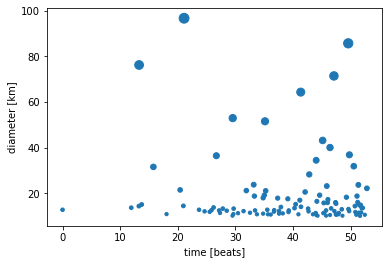

In [11]:
plt.scatter(t_data1, diameters, s=diameters)
plt.xlabel('time [beats]')
plt.ylabel('diameter [km]')
plt.show()

## 4. Normalize and scale

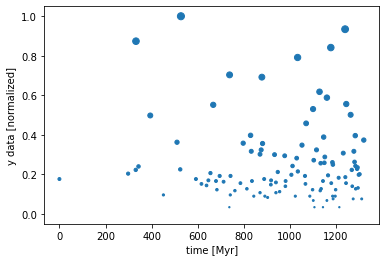

In [12]:
y_data = map_value(diameters, min(diameters), max(diameters), 0, 1) # normalize to 0~1

y_scale = 0.5 ## 0~1사이에서 더 퍼지게 하기 위해서 제곱을 함
              ## y_data 자체는 너무 오밀조밀하게 모여있음 
              ## -> 오밀조밀하게 모인 음을 낼 경우가 커짐
y_data = y_data**y_scale

plt.scatter(time_Myears, y_data, s=50*y_data)
plt.xlabel('time [Myr]')
plt.ylabel('y data [normalized]')
plt.show()

## 5. Midi 이용법

#### https://www.inspiredacoustics.com/en/MIDI_note_numbers_and_center_frequencies

In [1]:
from audiolazy import str2midi

str2midi('C#1') # int

25

In [27]:
# 4 octaves of major scale
# note_names = ['C2','D2','E2','F2','G2','A2','B2',
#              'C3','D3','E3','F3','G3','A3','B3',
#              'C4','D4','E4','F4','G4','A4','B4',
#              'C5','D5','E5','F5','G5','A5','B5']

# #4 octaves of major pentatonic scale 
# note_names = ['C2','D2','E2','G2','A2',
#              'C3','D3','E3','G3','A3',
#              'C4','D4','E4','G4','A4',
#              'C5','D5','E5','G5','A5']

# #custom note set (a voicing of a Cmaj13#11 chord, notes from C lydian)
note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']

note_midis = [str2midi(n) for n in note_names] #make a list of midi note numbers 

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')
# if you want higher just choose more number of midis
print(note_midis)

Resolution: 23 notes
[24, 36, 43, 48, 52, 55, 57, 59, 62, 64, 67, 69, 71, 74, 76, 79, 81, 83, 86, 88, 90, 91, 93]


## 6. data를 midi에 적용

In [28]:

midi_data = []
for i in range(n_impact):
    note_index = round(map_value(y_data[i],0, 1, n_notes-1, 0))
                                              ##  이부분으로 노트 위치 조정
                                              ##  큰 크리에이터가 높은음을 내려면 0,n_notes-1의 위치를 reverse해줘야함 
                                              ##  이 이유는 Midi의 숫자가 낮을수록 낮은 음이기 때문

    midi_data.append(note_midis[note_index])

print(midi_data)


[86, 86, 83, 48, 83, 69, 90, 76, 83, 24, 86, 88, 88, 86, 83, 67, 86, 88, 86, 86, 91, 59, 90, 86, 88, 88, 76, 88, 74, 79, 86, 90, 79, 90, 79, 59, 76, 86, 90, 90, 88, 86, 79, 90, 86, 83, 90, 81, 88, 86, 86, 83, 90, 81, 55, 83, 76, 86, 88, 71, 90, 88, 67, 91, 81, 91, 79, 62, 88, 81, 88, 86, 91, 74, 81, 81, 64, 91, 86, 48, 88, 81, 90, 83, 90, 90, 88, 86, 91, 79, 36, 86, 88, 67, 69, 83, 88, 90, 79, 81, 74, 83, 88, 93, 83, 83, 88, 86, 86, 90, 76]


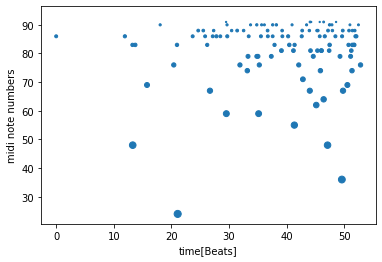

In [29]:
plt.scatter(t_data1, midi_data, s= 50*y_data) # midi data 대신 y_data를 사용하는 이유는
                                              # midi_data가 list형 && 그래프를 이용해서
                                              # 크기를 보려고하는데 midi datasms 이미 변형되어 이전값을 이용함
plt.xlabel('time[Beats]')
plt.ylabel('midi note numbers')
plt.show()

## 7. note의 속도 조절하기

In [30]:
v_min = 35
v_max = 127

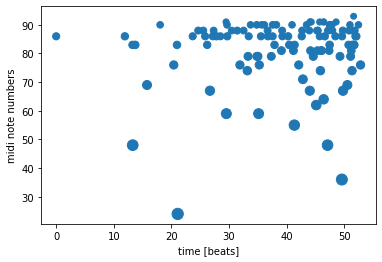

In [31]:
v_data = []
for i in range(n_impact):
    note_velocity = round(map_value(y_data[i], 0, 1, v_min, v_max))
    v_data.append(note_velocity)

plt.scatter(t_data1,midi_data,s=v_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

## 8. Save data as midi Fiile

In [34]:
from midiutil import MIDIFile #import library to make midi file, https://midiutil.readthedocs.io/en/1.2.1/
    
#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm*1.5) 

#add midi notes
for i in range(n_impact):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data1[i], duration=2, volume=v_data[i])

#create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f) 


### 8.1 들어보기

In [35]:
import sys 

import pygame #import library for playing midi files, https://pypi.org/project/pygame/

pygame.init()
pygame.mixer.music.load(filename + '.mid')
pygame.mixer.music.play()

